In [6]:
import scipy.io as sio
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np 
import os 

import mne
import numpy as np
import scipy.io as sio
 

In [7]:
# coding: utf-8

def _loadftfile(path):

    filecontents = sio.whosmat(path)
    
    strucname = filecontents[0][0]

    mat = sio.loadmat(path, squeeze_me=True, struct_as_record=False)
    matstruct = mat[strucname]
    return matstruct 


def _matstruc2mne(matstruct,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    ev_arr = mne.EvokedArray(matstruct.individual.mean(axis=0),myinfo,tmin=-0.2) ### Specific to this dataset, 200ms baseline
    ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
    return ev_arr


def _matstruc2latency(matstruct,peak_tmin,peak_tmax,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    
    all_chpeaks = []
    all_lat = []
    all_amp = []
    for mat in matstruct.individual:
    
        ev_arr = mne.EvokedArray(mat,myinfo,tmin=-0.2) ### Specific to this dataset, 200ms baseline
        ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
        chpeak,lat,amp = ev_arr.get_peak(tmin=peak_tmin,tmax=peak_tmax,return_amplitude=True,mode='neg')
        all_lat.append(lat)
        all_chpeaks.append(chpeak)
        all_amp.append(amp)
    return all_chpeaks,all_lat,all_amp


def _matstruc2mne_epochs(matstruct,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    ev_arr = mne.EpochsArray(matstruct.individual,myinfo,tmin=-0.2) ### Specific to this dataset, 200ms baseline
    ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
    return ev_arr

In [8]:
tcrop = 0.7

In [9]:
matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_bin_dev.mat'

mat_bin_dev = _loadftfile(matfile)

matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_bin_std.mat'

mat_bin_std = _loadftfile(matfile)



matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_ste_dev.mat'

mat_ste_dev = _loadftfile(matfile)

matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_ste_std.mat'

mat_ste_std = _loadftfile(matfile)


In [10]:
ev_bin_dev = _matstruc2mne(mat_bin_dev).crop(tmax=tcrop)
ev_bin_std = _matstruc2mne(mat_bin_std).crop(tmax=tcrop)

ev_ste_dev = _matstruc2mne(mat_ste_dev).crop(tmax=tcrop)
ev_ste_std = _matstruc2mne(mat_ste_std).crop(tmax=tcrop)

mne.equalize_channels([ev_bin_dev,ev_ste_dev,ev_bin_std,ev_ste_std])

Identifying common channels ...
Dropped the following channels:
['E35', 'E63', 'E169', 'E59', 'E160', 'E49', 'E201', 'E73', 'E144', 'E34', 'E256', 'E177', 'E12', 'E238', 'E168', 'E231', 'E213', 'E248', 'E245', 'E75', 'E64', 'E192', 'E138', 'E53', 'E47', 'E227', 'E203', 'E29', 'E9', 'E251', 'E253', 'E183', 'E125', 'E211', 'E150', 'E179', 'E158']


In [117]:
epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)

epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)
epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)

mne.equalize_channels([epochs_bin_dev,epochs_bin_std,epochs_ste_dev,epochs_ste_std])

19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found


<ipython-input-117-43cba28dbd19>:1: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
<ipython-input-117-43cba28dbd19>:2: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)
<ipython-input-117-43cba28dbd19>:4: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)


No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
Identifying common channels ...
Dropped the following channels:
['E35', 'E63', 'E169', 'E59', 'E160', 'E49', 'E201', 'E73', 'E144', 'E34', 'E256', 'E177', 'E12', 'E238', 'E168', 'E231', 'E213', 'E248', 'E245', 'E75', 'E64', 'E192', 'E138', 'E53', 'E47', 'E227', 'E203', 'E29', 'E9', 'E251', 'E253', 'E183', 'E125', 'E211', 'E150', 'E179', 'E158']


<ipython-input-117-43cba28dbd19>:5: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)


In [13]:
X_bin = [epochs_bin_dev.get_data().transpose(0, 2, 1),
     epochs_bin_std.get_data().transpose(0, 2, 1)]

X_ste = [epochs_ste_dev.get_data().transpose(0, 2, 1),
     epochs_ste_std.get_data().transpose(0, 2, 1)]


Analyse de clusters 

In [14]:
nperm = 1000

T_obs_bin,clusters_bin,clusters_pb_bin,H0_bin = mne.stats.spatio_temporal_cluster_test(X_bin,threshold=None,n_permutations=nperm,out_type='mask')

T_obs_ste,clusters_ste,clusters_pb_ste,H0_ste = mne.stats.spatio_temporal_cluster_test(X_ste,threshold=None,n_permutations=nperm,out_type='mask')

Using a threshold of 21.093024
stat_fun(H1): min=0.000000 max=60.500441
Running initial clustering
Found 31 clusters
Permuting 999 times...
[....................................... ] 99.30%  \   Computing cluster p-values
Done.
Using a threshold of 21.093024
stat_fun(H1): min=0.000000 max=31.585274
Running initial clustering
Found 18 clusters
Permuting 999 times...
[....................................... ] 99.30%  \   Computing cluster p-values
Done.


On récupère les channels trouvés grace a l'analyse de clusters 

In [17]:
def extract_electrodes_times(clusters,clusters_pb,tmin_ind=500,tmax_ind=640,alpha=0.005,evoked = ev_bin_dev):

    ch_list_temp = []
    time_list_temp = []

    for clust,pval in zip(clusters,clusters_pb):
        if pval < alpha:

            for j,curline in enumerate(clust[tmin_ind:tmax_ind]):

                for k,el in enumerate(curline):
                    if el:                    
                        ch_list_temp.append(evoked.ch_names[k])
                        time_list_temp.append(evoked.times[j+tmin_ind])

    return np.unique(ch_list_temp),np.unique(time_list_temp)


channels_deviance_ste,times_deviance_ste=extract_electrodes_times(clusters_ste,clusters_pb_ste)

channels_deviance_bin,times_deviance_bin=extract_electrodes_times(clusters_bin,clusters_pb_bin)

print(channels_deviance_bin),print(times_deviance_bin)

print(channels_deviance_ste),print(times_deviance_ste)

times_union = np.union1d(times_deviance_bin,times_deviance_ste)

ch_union = np.unique(np.hstack([channels_deviance_bin,channels_deviance_ste]))



['E108' 'E109' 'E110' 'E117' 'E118' 'E126' 'E127' 'E13' 'E131' 'E139'
 'E14' 'E140' 'E141' 'E142' 'E143' 'E15' 'E151' 'E152' 'E153' 'E2' 'E20'
 'E21' 'E220' 'E221' 'E222' 'E223' 'E224' 'E225' 'E239' 'E240' 'E241'
 'E243' 'E244' 'E247' 'E249' 'E250' 'E252' 'E27' 'E28' 'E30' 'E36' 'E4'
 'E40' 'E41' 'E5' 'E6']
[0.364 0.365 0.366 0.367 0.368 0.369 0.37  0.371 0.372 0.373 0.374 0.375
 0.376 0.377 0.378 0.379 0.38  0.381 0.382 0.383 0.384 0.385 0.386 0.387
 0.388 0.389 0.39  0.391 0.392 0.393 0.394 0.395 0.396 0.397 0.398 0.399
 0.4   0.401 0.417 0.418 0.419 0.42  0.421 0.422 0.423 0.424 0.425 0.426
 0.427 0.428 0.429 0.43  0.431 0.432 0.433 0.434 0.435 0.436 0.437 0.438
 0.439 0.44 ]
['E117' 'E118' 'E126' 'E127' 'E131' 'E139' 'E140' 'E141' 'E142' 'E143'
 'E151' 'E152' 'E153' 'E154']
[0.334 0.335 0.336 0.337 0.338 0.339 0.34  0.341 0.342 0.343 0.344 0.345
 0.346 0.347 0.348 0.349 0.35  0.351 0.352 0.353 0.354 0.355 0.356 0.421
 0.422 0.423 0.424 0.425 0.426 0.427 0.428 0.429 0.43  0.431 0.43

In [18]:
print(ch_union)

['E108' 'E109' 'E110' 'E117' 'E118' 'E126' 'E127' 'E13' 'E131' 'E139'
 'E14' 'E140' 'E141' 'E142' 'E143' 'E15' 'E151' 'E152' 'E153' 'E154' 'E2'
 'E20' 'E21' 'E220' 'E221' 'E222' 'E223' 'E224' 'E225' 'E239' 'E240'
 'E241' 'E243' 'E244' 'E247' 'E249' 'E250' 'E252' 'E27' 'E28' 'E30' 'E36'
 'E4' 'E40' 'E41' 'E5' 'E6']


In [98]:
#Selecting channels 
epochs_bin_dev_ch = epochs_bin_dev.pick_channels(ch_union)
epochs_bin_std_ch = epochs_bin_std.pick_channels(ch_union)
epochs_ste_dev_ch = epochs_ste_dev.pick_channels(ch_union)
epochs_ste_std_ch = epochs_ste_std.pick_channels(ch_union)

X_diff = [epochs_bin_dev_ch.get_data().transpose(0, 2, 1) - epochs_bin_std_ch.get_data().transpose(0, 2, 1),
     epochs_ste_dev_ch.get_data().transpose(0, 2, 1) - epochs_ste_std_ch.get_data().transpose(0, 2, 1)]

X_diff_ste_bin = X_diff[1]-X_diff[0]


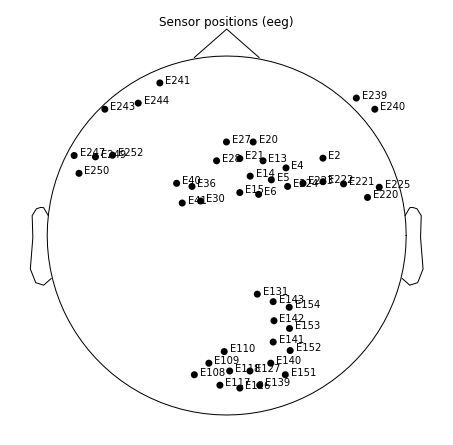

In [20]:
epochs_bin_dev_ch.plot_sensors(show_names=True)
plt.show()

In [146]:
roi = ['E117','E116','E108','E109','E151','E139','E141','E152','E110','E131','E143','E154','E142','E153','E140','E127','E118']

roi_frontal = ['E224','E223','E2','E4','E5','E6','E13','E14','E15','E20','E21','E27','E28','E30','E36','E40','E41']

In [147]:
len(roi_frontal),len(roi)

(17, 17)

One sample ttest FDR corrected  (per electrode)
--

In [70]:
from scipy.stats import ttest_1samp
from mne.stats import bonferroni_correction,fdr_correction

def ttest_amplitude(X,times_ind,ch_names,times):

    # Selecting time points  and averaging over time 
    amps = X[:,times_ind,:].mean(axis=1)
    
    T, pval = ttest_1samp(amps, 0)
    alpha = 0.05

    n_samples, n_tests= amps.shape
    threshold_uncorrected = stats.t.ppf(1.0 - alpha, n_samples - 1)

    reject_bonferroni, pval_bonferroni = bonferroni_correction(pval, alpha=alpha)
    threshold_bonferroni = stats.t.ppf(1.0 - alpha / n_tests, n_samples - 1)

    reject_fdr, pval_fdr = fdr_correction(pval, alpha=alpha, method='indep')
    
    mask_fdr = pval_fdr < 0.05
    mask_bonf = pval_bonferroni < 0.05

    print('FDR from %02f to %02f' % ((times[times_ind[0]]),times[times_ind[-1]]))
    for i,curi in enumerate(mask_fdr):
        if curi:
            print("Channel %s, T = %0.2f, p = %0.3f " % (ch_names[i], T[i],pval_fdr[i]))
    
    
    print('Bonferonni from %02f to %02f' % ((times[times_ind[0]]),times[times_ind[-1]]))
    for i,curi in enumerate(mask_bonf):
        if curi:
            print("Channel %s, T = %0.2f, p = %0.3f " % (ch_names[i], T[i],pval_bonferroni[i]))
    
    
    
    return T,pval,pval_fdr,pval_bonferronia

In [102]:
def ttest_amplitude_roi(X,times_ind,ch_names_roi,times):

    print(X.shape)
    # Selecting time points  and averaging over time 
    amps = X[:,times_ind,:].mean(axis=1)
    
    # averaging over channels
    amps = amps.mean(axis=1)
    
    T, pval = ttest_1samp(amps, 0)
    alpha = 0.05

    n_samples, _, n_tests= X.shape
    
    print('Uncorrected from %02f to %02f' % ((times[times_ind[0]]),times[times_ind[-1]]))
    print("T = %0.2f, p = %0.3f " % (T,pval))
    
    
    return T,pval,pval_fdr,pval_bonferroni

Tests de 280 a 440, par fenetres de 20 ms avec chevauchement de 10 ms

In [36]:
toi = np.arange(0.28,0.44,0.001)
toi_index = ev_bin_dev.time_as_index(toi)

In [38]:
wsize = 20
wstep = 10

In [44]:
toi

array([0.28 , 0.281, 0.282, 0.283, 0.284, 0.285, 0.286, 0.287, 0.288,
       0.289, 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297,
       0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306,
       0.307, 0.308, 0.309, 0.31 , 0.311, 0.312, 0.313, 0.314, 0.315,
       0.316, 0.317, 0.318, 0.319, 0.32 , 0.321, 0.322, 0.323, 0.324,
       0.325, 0.326, 0.327, 0.328, 0.329, 0.33 , 0.331, 0.332, 0.333,
       0.334, 0.335, 0.336, 0.337, 0.338, 0.339, 0.34 , 0.341, 0.342,
       0.343, 0.344, 0.345, 0.346, 0.347, 0.348, 0.349, 0.35 , 0.351,
       0.352, 0.353, 0.354, 0.355, 0.356, 0.357, 0.358, 0.359, 0.36 ,
       0.361, 0.362, 0.363, 0.364, 0.365, 0.366, 0.367, 0.368, 0.369,
       0.37 , 0.371, 0.372, 0.373, 0.374, 0.375, 0.376, 0.377, 0.378,
       0.379, 0.38 , 0.381, 0.382, 0.383, 0.384, 0.385, 0.386, 0.387,
       0.388, 0.389, 0.39 , 0.391, 0.392, 0.393, 0.394, 0.395, 0.396,
       0.397, 0.398, 0.399, 0.4  , 0.401, 0.402, 0.403, 0.404, 0.405,
       0.406, 0.407,

Printing and preparing all time windows

In [75]:
all_toi_indexes = []

for i in range(14):
    print(toi[10*i],toi[10*i + 20])
    cur_toi_ind = range(10*i+1,(10*i+21))
    all_toi_indexes.append(ev_bin_dev.time_as_index(toi[cur_toi_ind]))
    
print(toi[10*14],toi[10*14 + 19])
cur_toi_ind = range(10*14+1,(10*14+19))
all_toi_indexes.append(ev_bin_dev.time_as_index(toi[cur_toi_ind]))

0.28 0.30000000000000004
0.29000000000000004 0.31000000000000005
0.30000000000000004 0.32000000000000006
0.31000000000000005 0.33000000000000007
0.32000000000000006 0.3400000000000001
0.33000000000000007 0.3500000000000001
0.3400000000000001 0.3600000000000001
0.3500000000000001 0.3700000000000001
0.3600000000000001 0.3800000000000001
0.3700000000000001 0.3900000000000001
0.3800000000000001 0.40000000000000013
0.3900000000000001 0.41000000000000014
0.40000000000000013 0.42000000000000015
0.41000000000000014 0.43000000000000016
0.42000000000000015 0.43900000000000017


Tests on each time window

In [76]:
for cur_timewindow in all_toi_indexes:
    T,pval,pval_fdr,pval_bonferroni = ttest_amplitude(X_diff_ste_bin,cur_timewindow,epochs_bin_dev_ch.ch_names,times=epochs_bin_dev_ch.times)

FDR from 0.279000 to 0.298000
Channel E117, T = 3.61, p = 0.049 
Channel E126, T = 3.59, p = 0.049 
Bonferonni from 0.279000 to 0.298000
FDR from 0.289000 to 0.308000
Bonferonni from 0.289000 to 0.308000
FDR from 0.299000 to 0.318000
Bonferonni from 0.299000 to 0.318000
FDR from 0.309000 to 0.328000
Bonferonni from 0.309000 to 0.328000
FDR from 0.319000 to 0.338000
Channel E4, T = -2.96, p = 0.034 
Channel E6, T = -3.04, p = 0.034 
Channel E13, T = -3.15, p = 0.034 
Channel E14, T = -3.29, p = 0.034 
Channel E15, T = -3.30, p = 0.034 
Channel E20, T = -2.95, p = 0.034 
Channel E21, T = -3.79, p = 0.034 
Channel E27, T = -2.99, p = 0.034 
Channel E28, T = -3.36, p = 0.034 
Channel E36, T = -3.13, p = 0.034 
Channel E247, T = -2.89, p = 0.035 
Channel E249, T = -3.03, p = 0.034 
Channel E250, T = -2.82, p = 0.038 
Channel E252, T = -3.03, p = 0.034 
Bonferonni from 0.319000 to 0.338000
FDR from 0.329000 to 0.348000
Channel E4, T = -3.44, p = 0.019 
Channel E5, T = -3.33, p = 0.022 
Chann

On a channel subset (ROI) - average over channels

Parietal roi 

In [161]:
#Selecting channels 

epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)

epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)
epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)

mne.equalize_channels([epochs_bin_dev,epochs_bin_std,epochs_ste_dev,epochs_ste_std])

epochs_bin_dev_ch = epochs_bin_dev.pick_channels(roi)
epochs_bin_std_ch = epochs_bin_std.pick_channels(roi)
epochs_ste_dev_ch = epochs_ste_dev.pick_channels(roi)
epochs_ste_std_ch = epochs_ste_std.pick_channels(roi)

X_diff_roi = [epochs_bin_dev_ch.get_data().transpose(0, 2, 1) - epochs_bin_std_ch.get_data().transpose(0, 2, 1),
     epochs_ste_dev_ch.get_data().transpose(0, 2, 1) - epochs_ste_std_ch.get_data().transpose(0, 2, 1)]

X_diff_ste_bin_roi = X_diff_roi[1]-X_diff_roi[0]

for cur_timewindow in all_toi_indexes:
    T,pval,pval_fdr,pval_bonferroni = ttest_amplitude_roi(X_diff_ste_bin_roi,cur_timewindow,roi,times=epochs_bin_dev_ch.times)

19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata


<ipython-input-161-0c64b869fa39>:3: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
<ipython-input-161-0c64b869fa39>:4: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)
<ipython-input-161-0c64b869fa39>:6: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)


0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
Identifying common channels ...
Dropped the following channels:
['E35', 'E63', 'E169', 'E59', 'E160', 'E49', 'E201', 'E73', 'E144', 'E34', 'E256', 'E177', 'E12', 'E238', 'E168', 'E231', 'E213', 'E248', 'E245', 'E75', 'E64', 'E192', 'E138', 'E53', 'E47', 'E227', 'E203', 'E29', 'E9', 'E251', 'E253', 'E183', 'E125', 'E211', 'E150', 'E179', 'E158']
(19, 701, 17)
Uncorrected from 0.279000 to 0.298000
T = 2.52, p = 0.021 
(19, 701, 17)
Uncorrected from 0.289000 to 0.308000
T = 2.64, p = 0.017 
(19, 701, 17)
Uncorrected from 0.299000 to 0.318000
T = 2.74, p = 0.013 
(19, 701, 17)
Uncorrected from 0.309000 to 0.328000
T = 2.22, p = 0.039 
(19, 701, 17)
Uncorrected from 0.319000 to 0.338000
T = 1.43, p = 0.170 
(19, 701, 17)
Uncorrected from 0.329000 to 0.348000
T = 0.77, p = 0.453 
(19, 701, 17)
Uncorrected from 0.339000 to 0.358000
T = 0.34, p = 0.740 
(19, 701, 17)
Uncorrected fr

<ipython-input-161-0c64b869fa39>:7: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)


More than 6 channels, truncating title ...


<ipython-input-162-a047f4c05c0f>:13: RuntimeWarning: More than 6 channels, truncating title ...
  mne.viz.plot_compare_evokeds([grav_bin_std,grav_bin_dev,grav_ste_std,grav_ste_dev],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


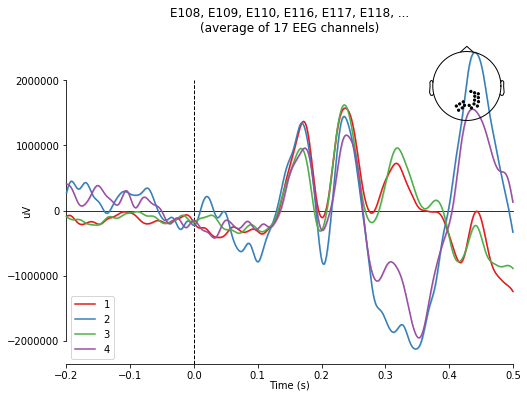

More than 6 channels, truncating title ...


<ipython-input-162-a047f4c05c0f>:16: RuntimeWarning: More than 6 channels, truncating title ...
  mne.viz.plot_compare_evokeds([evoked_bin,evoked_ste],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


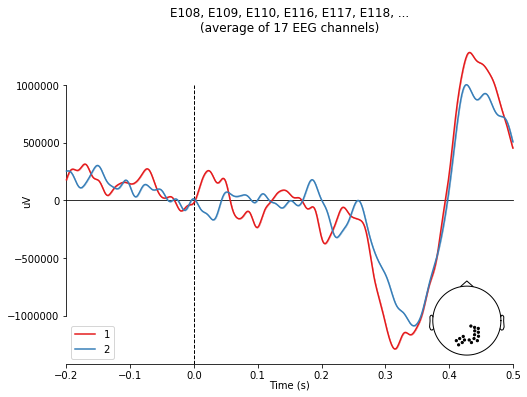

In [162]:
grav_bin_dev = epochs_bin_dev_ch.average()
grav_bin_std = epochs_bin_std_ch.average()
grav_ste_dev = epochs_ste_dev_ch.average()
grav_ste_std = epochs_ste_std_ch.average()

evoked_bin = mne.combine_evoked([grav_bin_dev, -grav_bin_std],
                            weights='equal')

evoked_ste = mne.combine_evoked([grav_ste_dev, -grav_ste_std],
                            weights='equal')


mne.viz.plot_compare_evokeds([grav_bin_std,grav_bin_dev,grav_ste_std,grav_ste_dev],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.show()

mne.viz.plot_compare_evokeds([evoked_bin,evoked_ste],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.show()

Frontal roi

In [163]:
#Selecting channels 

epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)

epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)
epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)

mne.equalize_channels([epochs_bin_dev,epochs_bin_std,epochs_ste_dev,epochs_ste_std])

epochs_bin_dev_ch = epochs_bin_dev.pick_channels(roi_frontal)
epochs_bin_std_ch = epochs_bin_std.pick_channels(roi_frontal)
epochs_ste_dev_ch = epochs_ste_dev.pick_channels(roi_frontal)
epochs_ste_std_ch = epochs_ste_std.pick_channels(roi_frontal)

X_diff_roi = [epochs_bin_dev_ch.get_data().transpose(0, 2, 1) - epochs_bin_std_ch.get_data().transpose(0, 2, 1),
     epochs_ste_dev_ch.get_data().transpose(0, 2, 1) - epochs_ste_std_ch.get_data().transpose(0, 2, 1)]

X_diff_ste_bin_roi = X_diff_roi[1]-X_diff_roi[0]

for cur_timewindow in all_toi_indexes:
    T,pval,pval_fdr,pval_bonferroni = ttest_amplitude_roi(X_diff_ste_bin_roi,cur_timewindow,roi,times=epochs_bin_dev_ch.times)



19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax


<ipython-input-163-84630c6ae82e>:3: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
<ipython-input-163-84630c6ae82e>:4: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)
<ipython-input-163-84630c6ae82e>:6: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)


19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
Identifying common channels ...
Dropped the following channels:
['E35', 'E63', 'E169', 'E59', 'E160', 'E49', 'E201', 'E73', 'E144', 'E34', 'E256', 'E177', 'E12', 'E238', 'E168', 'E231', 'E213', 'E248', 'E245', 'E75', 'E64', 'E192', 'E138', 'E53', 'E47', 'E227', 'E203', 'E29', 'E9', 'E251', 'E253', 'E183', 'E125', 'E211', 'E150', 'E179', 'E158']
(19, 701, 17)
Uncorrected from 0.279000 to 0.298000
T = -0.21, p = 0.833 
(19, 701, 17)
Uncorrected from 0.289000 to 0.308000
T = -0.50, p = 0.621 
(19, 701, 17)
Uncorrected from 0.299000 to 0.318000
T = -1.27, p = 0.222 
(19, 701, 17)
Uncorrected from 0.309000 to 0.328000
T = -2.07, p = 0.053 
(19, 701, 17)
Uncorrected from 0.319000 to 0.338000
T = -3.04, p = 0.007 
(19, 701, 17)
Uncorrected from 0.329000 to 0.348000
T = -3.41, p = 0.003 
(19, 701, 17)
Unco

<ipython-input-163-84630c6ae82e>:7: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)


More than 6 channels, truncating title ...


<ipython-input-164-a047f4c05c0f>:13: RuntimeWarning: More than 6 channels, truncating title ...
  mne.viz.plot_compare_evokeds([grav_bin_std,grav_bin_dev,grav_ste_std,grav_ste_dev],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


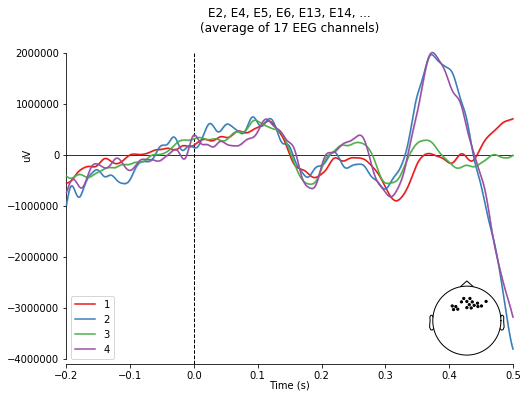

More than 6 channels, truncating title ...


<ipython-input-164-a047f4c05c0f>:16: RuntimeWarning: More than 6 channels, truncating title ...
  mne.viz.plot_compare_evokeds([evoked_bin,evoked_ste],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


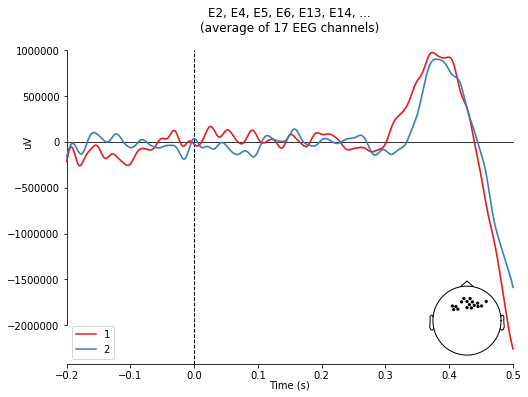

In [164]:
grav_bin_dev = epochs_bin_dev_ch.average()
grav_bin_std = epochs_bin_std_ch.average()
grav_ste_dev = epochs_ste_dev_ch.average()
grav_ste_std = epochs_ste_std_ch.average()

evoked_bin = mne.combine_evoked([grav_bin_dev, -grav_bin_std],
                            weights='equal')

evoked_ste = mne.combine_evoked([grav_ste_dev, -grav_ste_std],
                            weights='equal')


mne.viz.plot_compare_evokeds([grav_bin_std,grav_bin_dev,grav_ste_std,grav_ste_dev],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.show()

mne.viz.plot_compare_evokeds([evoked_bin,evoked_ste],picks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.show()

In [131]:
mne.viz.plot_compare_evokeds?

In [466]:
from scipy import stats
from mne.stats import bonferroni_correction,fdr_correction
T, pval = ttest_1samp(X_diff_ste_bin, 0)
alpha = 0.05

n_samples, n_tests,_ = X_diff_ste_bin.shape
threshold_uncorrected = stats.t.ppf(1.0 - alpha, n_samples - 1)

reject_bonferroni, pval_bonferroni = bonferroni_correction(pval, alpha=alpha)
threshold_bonferroni = stats.t.ppf(1.0 - alpha / n_tests, n_samples - 1)

reject_fdr, pval_fdr = fdr_correction(pval, alpha=alpha, method='indep')
#threshold_fdr = np.min(np.abs(T)[reject_fdr])

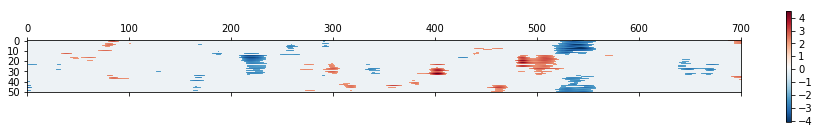

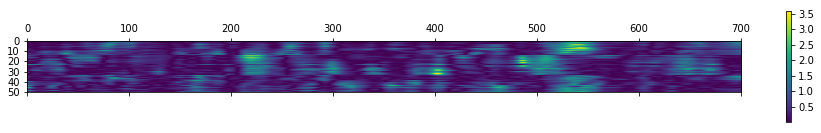

In [467]:
masking_mat = pval<0.05

Tbis = np.zeros_like(T)
Tbis[masking_mat] = T[masking_mat]


plt.matshow(Tbis.T,cmap=plt.cm.RdBu_r)
plt.colorbar()
plt.show()

plt.matshow(-np.log10(pval).T)
plt.colorbar()

a faire :
- figures au propre (avec bandes de sig) 
- stats : refaire des stats de ROI avec une TW unique pour P3a et une pour P3b (reprendre par rapport à tous les sujets) 
- retenter les clusters sur X_diff
- faire graph des T value au propre ? 